In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import scipy as sci

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#files
import os

In [51]:
os.getcwd()
df = pd.read_csv('../Data/train.csv')
dt = pd.read_csv('../Data/test.csv')

In [3]:
df.head(3)

,Index,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
0,0,1,1,363,0.002696,0.530040,0.400810,1.300048e-06,4.639533e-06,1.073594e-05,0.000022,0.000044,0.002212,6.214737e-07,200.000000,-0.000196,1.533780
1,1,1,1,1223,0.081093,1.366218,1.325157,1.656861e-05,3.024668e-05,5.261872e-05,0.000042,0.000042,0.010932,3.414868e-05,300.000000,-0.003798,0.843604
2,2,1,1,1372,0.009561,0.464871,0.328008,6.500872e-08,2.323204e-07,5.182686e-07,0.000001,0.000002,0.000306,4.079460e-08,159.692076,-0.000003,29.824024


In [4]:
df.shape

(623817, 17)

In [15]:
c = df.columns
c

Index(['Index', 'Market', 'Day', 'Stock', 'x0', 'x1', 'x2', 'x3A', 'x3B',
       'x3C', 'x3D', 'x3E', 'x4', 'x5', 'x6', 'y', 'Weight'],
      dtype='object')

In [53]:
#get rid of NaN values
#find out which columns has null values
columns = df.columns
for i in range(len(df.columns)):
    index = df.index[df[columns[i]].isnull()]
    if index.shape[0]>0:
        print(df.columns[i],index.shape)
        df[columns[i]] = df[columns[i]].fillna(0)

In [54]:
#training dataset and test dataset
x_train = df.drop(['Weight','y'],axis = 1)
x_weight = np.array(df.Weight)
y_train = df.y
x_test = dt

In [32]:
#regression modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

In [35]:
#KNN Regressor 25.6%
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
acc_knn = round(knn.score(x_train,y_train)*100,2)
acc_knn

25.6

In [ ]:
#Random Forest 36.7%
rf = RandomForestRegressor()
rf.fit(x_train,y_train,sample_weight = x_weight)
acc_rf = round(rf.score(x_train,y_train,x_weight)*100,2)
acc_rf

In [55]:
#Decision Tree Regressor 92.59%!!!
decisiontree = DecisionTreeRegressor()
decisiontree.fit(x_train,y_train)
acc_dt = round(decisiontree.score(x_train,y_train)*100,2)
yp = decisiontree.predict(x_test)
acc_dt

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [131]:
#np.arrange(start,stop,step)
#np.array_split(array, NSplits)
# split into 5 sets and validate
xsplit = np.array_split(x_train,5)
ysplit = np.array_split(y_train,5)
fold_score = list()
for k in range(5):
    xfold_train = list(xsplit)
    #pop off the kth set
    xfold_test = xfold_train.pop(k)
    #concatenate the rest
    xfold_train = np.concatenate(xfold_train)
    yfold_train = list(ysplit)
    #pop off the kth set
    yfold_test = yfold_train.pop(k)
    #concatenate the rest
    yfold_train = np.concatenate(yfold_train)
    #test each set and append scores
    rf.fit(xfold_train,yfold_train)
    print(rf.score(xfold_test,yfold_test))
    #fold_score.append(rf.fit(xfold_train, yfold_train).score(xfold_test, yfold_test))    

-0.07728700785131926
-0.051763453528250514
0.0659693075757749
0.1280588270075126
0.10305517210521475


In [224]:

#using random forest regressor, very low, around 10%
# kfold returns array indexes
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def run_kfold(model):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(x_train):
        fold += 1
        xfold_train, xfold_test = x_train.values[train_index], x_train.values[test_index]
        yfold_train, yfold_test = y_train.values[train_index], y_train.values[test_index]
        xfold_weight = x_weight[train_index]
        model.fit(xfold_train, yfold_train)
        #predictions = model.predict(xfold_test)
        accuracy = model.score(xfold_test, yfold_test)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(rf)

Fold 1 accuracy: 0.08160542313407126
Fold 2 accuracy: -0.04748002210001068
Fold 3 accuracy: -0.017682503865019905
Fold 4 accuracy: 0.009632548771566274
Fold 5 accuracy: 0.0150056421368846
Fold 6 accuracy: 0.12184604840497038
Fold 7 accuracy: 0.14461839290483514
Fold 8 accuracy: 0.11090489483175149


KeyboardInterrupt: 

In [26]:
# gridsearchCV
# what parameters are there for random forest regressor?
from sklearn.model_selection import GridSearchCV
def RFTuneParameter(x_train, y_train, weight):
    rf = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [20,30,40],
            "max_depth"         : [3, 4, 5],
            "min_samples_split" : [2,4,6],
            "min_weight_fraction_leaf" : [0.001, 0.01, 0.02]
            }
    rfcv = GridSearchCV(rf,param_grid)
    if type(weight)==str:
        rfcv.fit(x_train,y_train)
    else:
        rfcv.fit(x_train,y_train,weight)
    return rfcv.best_score_, rfcv.best_params_
RFTuneParameter(x_train,y_train,x_weight)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [157]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [167]:
#get rid of NaN values
#find out which columns has null values
newdt = dt
for i in range(len(dt.columns)):
    index = newdt.index[dt[columns[i]].isnull()]
    if index.shape[0]>0:
        print(columns[i],index.shape)
        dt[columns[i]] = dt[columns[i]].fillna(0)

x1 (62,)
x2 (2,)


In [186]:
x_test = newdt
print(x_train.columns)
print(x_test.columns)
x_weight = np.array(x_train.Weight)
newx = x_train.drop(['Weight'],axis = 1)

Index(['Index', 'Market', 'Day', 'Stock', 'x0', 'x1', 'x2', 'x3A', 'x3B',
       'x3C', 'x3D', 'x3E', 'x4', 'x5', 'x6', 'Weight'],
      dtype='object')
Index(['Index', 'Market', 'Day', 'Stock', 'x0', 'x1', 'x2', 'x3A', 'x3B',
       'x3C', 'x3D', 'x3E', 'x4', 'x5', 'x6'],
      dtype='object')


In [229]:
# use command / to comment out a block
#Decision Tree Regressor 92.59%!!!
decisiontree = DecisionTreeRegressor()
decisiontree.fit(newx,y_train)
#acc_dt = round(decisiontree.score(new_x,y_train)*100,2)
yp = pd.Series(decisiontree.predict(x_test)).rename('y')



In [196]:
yp.index.name = 'Index'
yp.head()

Index
0    0.000624
1    0.000031
2   -0.000025
3    0.000031
4    0.000361
Name: y, dtype: float64

(array([7.0000e+00, 5.0000e+00, 3.6000e+01, 4.4100e+02, 6.0951e+05,
        3.0039e+04, 3.0500e+02, 6.8000e+01, 1.7000e+01, 2.0000e+00]),
 array([-0.04956444, -0.03941969, -0.02927494, -0.0191302 , -0.00898545,
         0.0011593 ,  0.01130405,  0.0214488 ,  0.03159355,  0.0417383 ,
         0.05188305]),
 <a list of 10 Patch objects>)

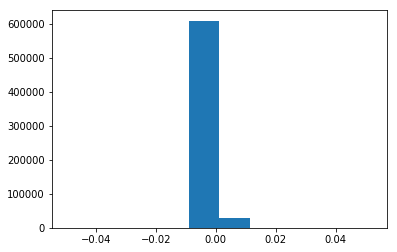

In [197]:
plt.hist(yp)

In [201]:
yp.to_csv('RandomForestRegressor_model.csv', header=True)

In [202]:
test = pd.read_csv('RandomForestRegressor_model.csv')

In [203]:
test.info

<bound method DataFrame.info of          Index         y
0            0  0.000624
1            1  0.000031
2            2 -0.000025
3            3  0.000031
4            4  0.000361
5            5  0.000031
6            6  0.000031
7            7  0.000031
8            8  0.000713
9            9  0.000031
10          10  0.000031
11          11 -0.000025
12          12  0.000031
13          13  0.000031
14          14  0.000031
15          15  0.000198
16          16 -0.000021
17          17  0.000031
18          18  0.000688
19          19  0.000198
20          20  0.000236
21          21 -0.000025
22          22 -0.000025
23          23  0.000031
24          24  0.000031
25          25  0.000236
26          26  0.000236
27          27  0.000031
28          28  0.000031
29          29  0.000409
...        ...       ...
640400  640400  0.000031
640401  640401  0.000038
640402  640402 -0.000140
640403  640403 -0.000059
640404  640404  0.003978
640405  640405 -0.000961
640406  640406  0.

694.0019300358749

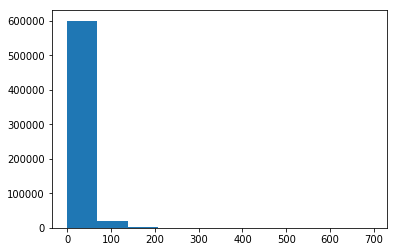

In [219]:
plt.hist(x_weight)
max(x_weight)

In [230]:
importance = decisiontree.feature_importances_

([<matplotlib.axis.XTick at 0x1a42754a90>,
 <a list of 15 Text xticklabel objects>)

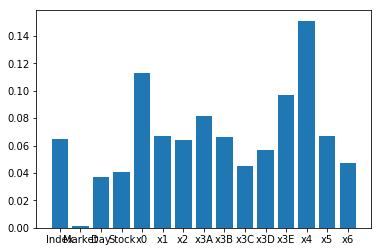

In [232]:
plt.bar(range(x_train.shape[1]),importance)
plt.xticks(range(x_train.shape[1]),x_train.columns)

In [233]:
x_train = df.drop(['y'], axis = 1)

In [234]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

([<matplotlib.axis.XTick at 0x1a426cbc18>,
 <a list of 16 Text xticklabel objects>)

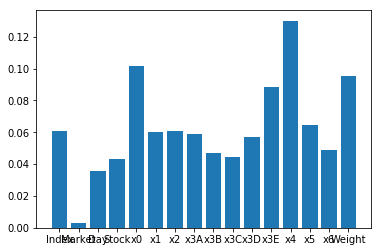

In [235]:
#get feature importance from random forest regression
importance = rf.feature_importances_
plt.bar(range(x_train.shape[1]),importance)
plt.xticks(range(x_train.shape[1]),x_train.columns)

In [236]:
xpseudo_weight = np.ones(x_test.shape[0])

In [240]:
type('none')

str

In [241]:
type(0.03)

float

In [242]:
test = np.array(3)

In [255]:
type(x_weight)==ndarray

NameError: name 'ndarray' is not defined

In [253]:
type('none')==str

True

In [1]:
import xgboost